In [54]:
from dataset_utils import mnist, svhn

import os
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [42]:
def get_tf_dataset(path_to_tfrecords, parsing_fn, shuffle_buffer=1000, batch_size=8):
    """Create a basic tensorflow Dataset object from a TFRecords.
    
    Args:
        path_to_tfrecords: Path to the TFrecords
        parsing_fn: parsing function to apply to every element (load Examples)
        shuffle_buffer: Shuffle buffer size to randomize the dataset
        batch_size: Batch size
    """
    data = tf.data.TFRecordDataset(path_to_tfrecords)
    data = data.shuffle(shuffle_buffer)
    data = data.map(parsing_fn)
    data = data.repeat()
    data = data.batch(batch_size)
    iterator = data.make_one_shot_iterator()
    in_ = iterator.get_next()
    return in_

### MNIST
---
Original Download [[link]](http://yann.lecun.com/exdb/mnist/)

Dataset will contain:

  * `image`: (28, 28, 1) float array in [0, 1]
  * `class`: scalar in 0-9

In [51]:
source_path = os.path.expanduser('~/Data/MNIST/')
target_path = 'tf_mnist'

In [52]:
%%time
# convert MNIST dataset to TFRecords
converter = mnist.MNISTConverter(source_path)
converter.convert(target_path)

Loading original MNIST data from /home/aroyer/Data/MNIST/
Load train: 60000 / 60000
Wrote train in file tf_mnist_train

Load test: 10000 / 10000
Wrote test in file tf_mnist_test

CPU times: user 8.89 s, sys: 245 ms, total: 9.13 s
Wall time: 9.1 s


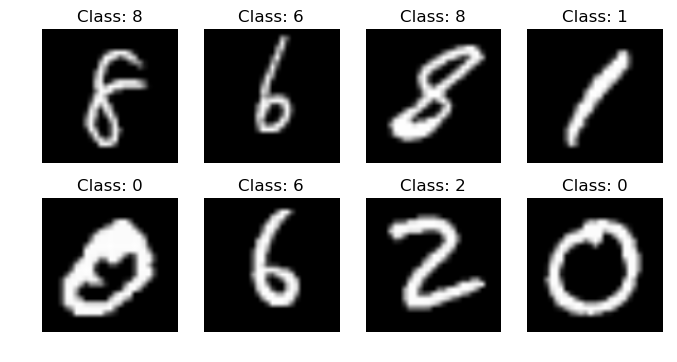

In [53]:
# load training dataset and resize image to 128
loader = mnist.MNISTLoader(resize=128)
with tf.Graph().as_default():
    data = get_tf_dataset('%s_train' % target_path, loader.parsing_fn)
    with tf.Session() as sess:
        data_ = sess.run(data)
# Display
_, axis = plt.subplots(2, 4, figsize=(8, 4))
for i, ax in enumerate(axis.flatten()):
    ax.set_title('Class: %d' % data_['class'][i])
    ax.imshow(np.tile(data_['image'][i], (1, 1, 3)))
    ax.set_axis_off()
plt.show()

### SVHN
---
Original Download [[link]](http://ufldl.stanford.edu/housenumbers/)

**Format 2** (32x32 images saved in a mat file)

Dataset will contain:

  * `image`: (32, 32, 3) float array in [0, 1]
  * `class`: scalar in 0-9

In [78]:
source_path = os.path.expanduser('~/Data/SVHN/')
target_path = 'tf_svhn'

In [79]:
%%time
# convert SVHN dataset to TFRecords
converter = svhn.SVHNConverter(source_path)
converter.convert(target_path)

Loading original SVHN data from /home/aroyer/Data/SVHN/
Load train: 73257 / 73257
Wrote train in file tf_svhn_train

Load test: 26032 / 26032
Wrote test in file tf_svhn_test

CPU times: user 11.4 s, sys: 857 ms, total: 12.3 s
Wall time: 12.5 s


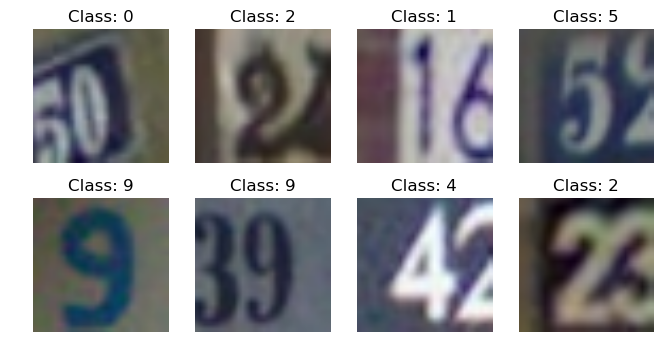

In [81]:
# load training dataset
loader = svhn.SVHNLoader(resize=64)
with tf.Graph().as_default():
    data = get_tf_dataset('%s_train' % target_path, loader.parsing_fn)
    with tf.Session() as sess:
        data_ = sess.run(data)
# Display
_, axis = plt.subplots(2, 4, figsize=(8, 4))
for i, ax in enumerate(axis.flatten()):
    ax.set_title('Class: %d' % data_['class'][i])
    ax.imshow(data_['image'][i])
    ax.set_axis_off()
plt.show()